In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [4]:
sea_level_z0_1_mod = xr.open_dataset(input_path + 'sea_level_z0_1_mod.nc').sea_level_z0_1_mod*100
print(sea_level_z0_1_mod)
sea_level_z0_1_slope_mod = xr.open_dataset(input_path + 'sea_level_z0_1_slope_mod.nc').sea_level_z0_1_slope_mod*10*100
print(sea_level_z0_1_slope_mod)
sea_level_z0_1_p_value_mod = xr.open_dataset(input_path + 'sea_level_z0_1_p_value_mod.nc').sea_level_z0_1_p_value_mod
print(sea_level_z0_1_p_value_mod)
sea_level_z0_1_std_err_mod = xr.open_dataset(input_path + 'sea_level_z0_1_std_err_mod.nc').sea_level_z0_1_std_err_mod*10*100
print(sea_level_z0_1_std_err_mod)

sea_level_z0_025_mod = xr.open_dataset(input_path + 'sea_level_z0_025_mod.nc').sea_level_z0_025_mod*100
print(sea_level_z0_025_mod)
sea_level_z0_025_slope_mod = xr.open_dataset(input_path + 'sea_level_z0_025_slope_mod.nc').sea_level_z0_025_slope_mod*10*100
print(sea_level_z0_025_slope_mod)
sea_level_z0_025_p_value_mod = xr.open_dataset(input_path + 'sea_level_z0_025_p_value_mod.nc').sea_level_z0_025_p_value_mod
print(sea_level_z0_025_p_value_mod)
sea_level_z0_025_std_err_mod = xr.open_dataset(input_path + 'sea_level_z0_025_std_err_mod.nc').sea_level_z0_025_std_err_mod*10*100
print(sea_level_z0_025_std_err_mod)

# sea_level_z0_01_mod = xr.open_dataset(input_path + 'sea_level_z0_01_mod.nc').sea_level_z0_01_mod*100
# print(sea_level_z0_01_mod)
# sea_level_z0_01_slope_mod = xr.open_dataset(input_path + 'sea_level_z0_01_slope_mod.nc').sea_level_z0_01_slope_mod*10*100
# print(sea_level_z0_01_slope_mod)
# sea_level_z0_01_p_value_mod = xr.open_dataset(input_path + 'sea_level_z0_01_p_value_mod.nc').sea_level_z0_01_p_value_mod*100
# print(sea_level_z0_01_p_value_mod)
# sea_level_z0_01_std_err_mod = xr.open_dataset(input_path + 'sea_level_z0_01_std_err_mod.nc').sea_level_z0_01_std_err_mod*10*100
# print(sea_level_z0_01_std_err_mod)

<xarray.DataArray 'sea_level_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 25)>
array([[[        nan,         nan, ...,         nan,         nan],
        [        nan,         nan, ...,         nan,         nan],
        ...,
        [-180.42372 , -179.72704 , ..., -180.10028 , -180.39162 ],
        [-180.28194 , -179.5696  , ..., -179.937   , -180.22562 ]],

       [[        nan,         nan, ...,         nan,         nan],
        [        nan,         nan, ...,         nan,         nan],
        ...,
        [-180.2441  , -179.52153 , ..., -179.55736 , -179.70546 ],
        [-180.00914 , -179.2714  , ..., -179.30388 , -179.4382  ]],

       ...,

       [[  57.062405,   55.258095, ...,   62.44083 ,   61.503494],
        [  57.21014 ,   55.301052, ...,   63.22639 ,   62.24522 ],
        ...,
        [  66.01095 ,   63.699013, ...,   69.0162  ,   73.67217 ],
        [  65.51277 ,   63.24628 , ...,   68.67503 ,   73.7148  ]],

       [[  57.946796,   55.925934, ...,   63.60856 ,   62.

In [5]:
sea_level_z0_obs = xr.open_dataset(input_path + 'sea_level_z0_obs.nc').sea_level_z0_obs*100
print(sea_level_z0_obs)
sea_level_z0_slope_obs = xr.open_dataset(input_path + 'sea_level_z0_slope_obs.nc').sea_level_z0_slope_obs*10*100
print(sea_level_z0_slope_obs)
sea_level_z0_p_value_obs = xr.open_dataset(input_path + 'sea_level_z0_p_value_obs.nc').sea_level_z0_p_value_obs
print(sea_level_z0_p_value_obs)
sea_level_z0_std_err_obs = xr.open_dataset(input_path + 'sea_level_z0_std_err_obs.nc').sea_level_z0_std_err_obs*10*100
print(sea_level_z0_std_err_obs)

sea_level_z0_1_obs = xr.open_dataset(input_path + 'sea_level_z0_1_obs.nc').sea_level_z0_1_obs*100
print(sea_level_z0_1_obs)
sea_level_z0_1_slope_obs = xr.open_dataset(input_path + 'sea_level_z0_1_slope_obs.nc').sea_level_z0_1_slope_obs*10*100
print(sea_level_z0_1_slope_obs)
sea_level_z0_1_p_value_obs = xr.open_dataset(input_path + 'sea_level_z0_1_p_value_obs.nc').sea_level_z0_1_p_value_obs
print(sea_level_z0_1_p_value_obs)
sea_level_z0_1_std_err_obs = xr.open_dataset(input_path + 'sea_level_z0_1_std_err_obs.nc').sea_level_z0_1_std_err_obs*10*100
print(sea_level_z0_1_std_err_obs)

sea_level_z0_025_obs = xr.open_dataset(input_path + 'sea_level_z0_025_obs.nc').sea_level_z0_025_obs*100
print(sea_level_z0_025_obs)
sea_level_z0_025_slope_obs = xr.open_dataset(input_path + 'sea_level_z0_025_slope_obs.nc').sea_level_z0_025_slope_obs*10*100
print(sea_level_z0_025_slope_obs)
sea_level_z0_025_p_value_obs = xr.open_dataset(input_path + 'sea_level_z0_025_p_value_obs.nc').sea_level_z0_025_p_value_obs
print(sea_level_z0_025_p_value_obs)
sea_level_z0_025_std_err_obs = xr.open_dataset(input_path + 'sea_level_z0_025_std_err_obs.nc').sea_level_z0_025_std_err_obs*10*100
print(sea_level_z0_025_std_err_obs)

# sea_level_z0_01_obs = xr.open_dataset(input_path + 'sea_level_z0_01_obs.nc').sea_level_z0_01_obs*100
# print(sea_level_z0_01_obs)
# sea_level_z0_01_slope_obs = xr.open_dataset(input_path + 'sea_level_z0_01_slope_obs.nc').sea_level_z0_01_slope_obs*10*100
# print(sea_level_z0_01_slope_obs)
# sea_level_z0_01_p_value_obs = xr.open_dataset(input_path + 'sea_level_z0_01_p_value_obs.nc').sea_level_z0_01_p_value_obs
# print(sea_level_z0_01_p_value_obs)
# sea_level_z0_01_std_err_obs = xr.open_dataset(input_path + 'sea_level_z0_01_std_err_obs.nc').sea_level_z0_01_std_err_obs*10*100
# print(sea_level_z0_01_std_err_obs)

<xarray.DataArray 'sea_level_z0_obs' (lat: 351, lon: 451, year: 25)>
array([[[-4.197777, -8.154687, ...,  6.373379,  6.26797 ],
        [-4.131319, -9.3378  , ...,  5.372964,  5.654121],
        ...,
        [-3.676953,  0.334032, ...,  2.623221,  5.068366],
        [-3.125193,  0.37545 , ...,  3.099557,  5.227399]],

       [[-4.010994, -8.452582, ...,  7.401364,  5.669171],
        [-3.840971, -9.73614 , ...,  6.516571,  4.897292],
        ...,
        [-4.470863,  0.987591, ...,  1.536635,  5.692918],
        [-3.731653,  1.064727, ...,  1.97386 ,  5.554119]],

       ...,

       [[-4.629045, -2.955058, ..., 11.935655,  4.584535],
        [-4.602945, -3.585644, ..., 12.041616,  4.675047],
        ...,
        [-7.224325, -6.937952, ...,  3.68211 ,  5.987238],
        [-7.063809, -6.654813, ...,  3.600598,  5.951451]],

       [[-4.733777, -3.172967, ..., 12.212292,  4.57145 ],
        [-4.729024, -3.807997, ..., 12.254907,  4.665013],
        ...,
        [-7.240001, -7.338388, ...

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5368181818181819, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5368181818181819, 0.5131521739130435, 0.88]
Bbox(x0=0.7315217391304348, y0=0.5368181818181819, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.5368181818181819, 1.0075, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.20000000000000012, 0.31097826086956526, 0.5431818181818182]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.20000000000000012, 0.5131521739130435, 0.5431818181818182]
Bbox(x0=0.7315217391304348, y0=0.1250000000000001, x1=0.9000000000000001, y1=0.46818181818181825)
[0.8215217391304348, 0.20000000000000012, 1.0075, 0.5431818181818182]


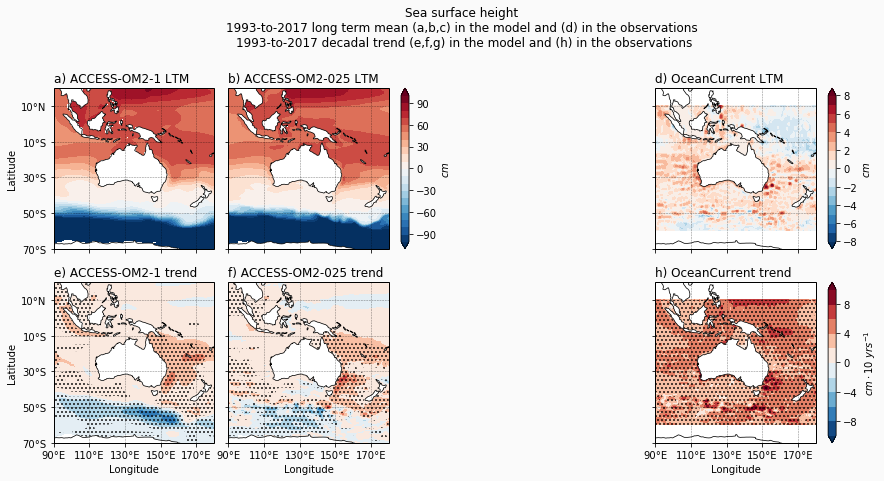

In [9]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Sea surface height ' +
    '\n1993-to-2017 long term mean (a,b,c) in the model and ' +
    '(d) in the observations ' +
    '\n1993-to-2017 decadal trend (e,f,g) in the model and ' +
    '(h) in the observations',
    x=0.6,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-100,100,10)
cmap = plt.cm.RdBu_r
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_025_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# # levels=arange(0,30,2)
# # cmap = plt.cm.Spectral
# data = sea_level_z0_01_mod.mean('year')
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$cm$', cax=axins)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
print(pos_plot)
levels=arange(-8,8,1)
# cmap = plt.cm.Spectral
data = sea_level_z0_obs.mean('year')
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) OceanCurrent LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$cm$', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
levels=arange(-10,10,2)
cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

# ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
# print(pos_plot)
# # levels=arange(-1,1,0.1)
# # cmap = plt.cm.RdBu_r
# data = sea_level_z0_01_slope_mod
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = sea_level_z0_01_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)

ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.075, pos.x1+0.1075, pos.y1+0.075]
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_slope_obs
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_p_value_obs
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) OceanCurrent trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$cm \cdot 10\ yrs^{-1}$', cax=axins)

savefigure('sea_surface_height_absolute')

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5368181818181819, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5368181818181819, 0.5131521739130435, 0.88]
Bbox(x0=0.5293478260869566, y0=0.5368181818181819, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.5368181818181819, 0.7153260869565218, 0.88]
Bbox(x0=0.7315217391304348, y0=0.5368181818181819, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.5368181818181819, 1.0075, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.20000000000000012, 0.31097826086956526, 0.5431818181818182]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.20000000000000012, 0.5131521739130435, 0.5431818181818182]
Bbox(x0=0.5293478260869566, y0=0.1250000000000001, x1=0.6978260869565218, y1=0.46818181818181825)
[0

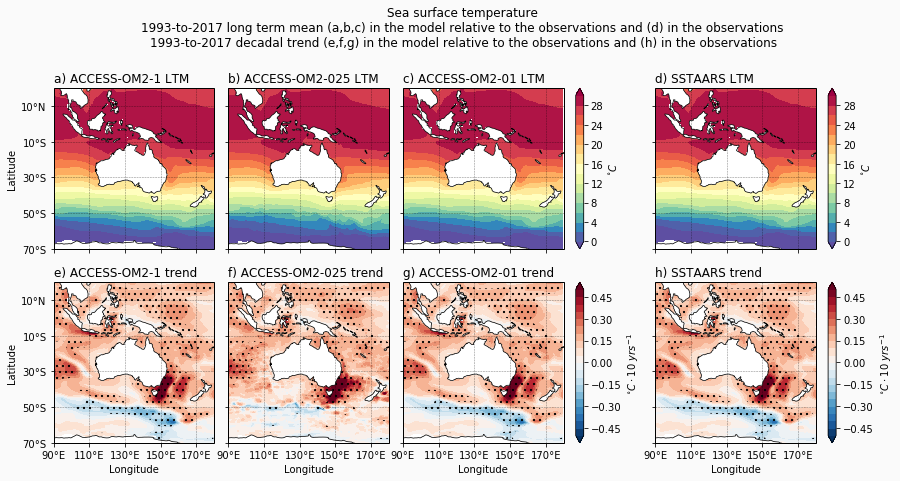

In [32]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Sea surface sea_levelerature ' +
    '\n1993-to-2017 long term mean (a,b,c) in the model relative to the observations and ' +
    '(d) in the observations ' +
    '\n1993-to-2017 decadal trend (e,f,g) in the model relative to the observations and ' +
    '(h) in the observations',
    x=0.6,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(0,30,2)
cmap = plt.cm.Spectral_r
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_025_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C$', cax=axins)

ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) SSTAARS LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C$', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
levels=arange(-0.5,0.5,0.05)
cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.075, pos.x1+0.1075, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) SSTAARS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

# savefigure('sea_surface_sea_levelerature_absolute')